In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas
import scipy
from scipy import io
from scipy import stats
from datetime import datetime

In [2]:
def cov_to_pts( cov ):
    circ = np.linspace( 0, 2*np.pi, 100 )
    sf = np.asarray( [ np.cos( circ ), np.sin( circ ) ] )
    [u,s,v] = np.linalg.svd( cov )
    pmat = u*2.447*np.sqrt(s) # 95% confidence
    return np.dot(  pmat, sf )

In [3]:
data = io.loadmat('data/old_faithful.mat')['data']
data = data - data.mean(axis = 0)

In [4]:
# the Gaussian means (as column vectors -- ie, the mean for Gaussian 0 is mus[:,0]
mus = np.asarray( [[-1.17288986, -0.11642103],
                   [-0.16526981,  0.70142713]])
 
# the Gaussian covariance matrices
covs = list()
covs.append( 
    np.asarray([[ 0.74072815,  0.09252716],
                [ 0.09252716,  0.5966275 ]]) )
covs.append( 
    np.asarray([[ 0.39312776, -0.46488887],
                [-0.46488887,  1.64990767]]) )
 
# The Gaussian mixing weights
mws = np.array([ 0.68618439, 0.31381561 ])  # called alpha in the slides
clusters = 2

In [5]:
def update_weights(mus, covs, mws):
    weights = np.array([stats.multivariate_normal.pdf(data, mus[k], covs[k]) * mws[k] for k in range(clusters)])
    return weights / np.sum(weights, axis=0)

# weights = update_weights(mus, covs, mws)
# print weights

In [6]:
def update_mws(mws, weights):
    mws = np.sum(weights, axis=1)
    return mws / np.sum(mws)

# mws = update_mws(mws, weights)
# print mws

In [7]:
def update_covs(covs, mus, weights):
    for k in range(clusters):
        tmp = data - mus[k]
#         print tmp.shape
#         print weights[k].T.shape
#         print np.multiply(weights[k].T, tmp)
#         covs[k] = np.matmul(np.dot(weights[k].T, tmp), tmp) / np.sum(weights[k])
#         print covs[k]
        tmp2 = weights[k] * tmp.T
        covs[k] = np.dot(tmp2, tmp) / np.sum(weights[k])
    return covs

# covs = update_covs(covs, mus, weights)
# print covs

In [8]:
def update_mus(mus, weights):
    for k in range(clusters):
        mus[k] = np.dot(weights[k], data) / np.sum(weights[k])
    return mus

# mus = update_mus(mus, weights)
# print mus

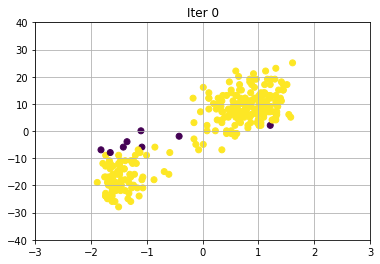

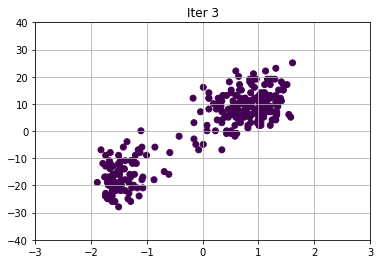

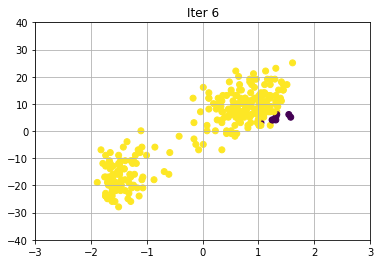

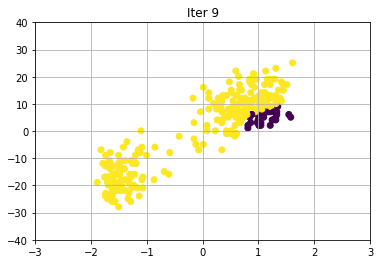

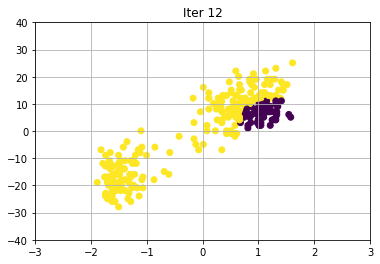

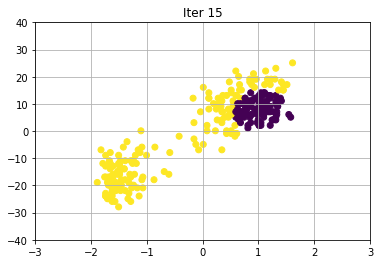

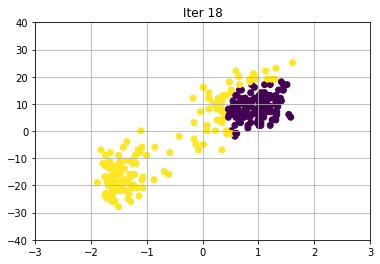

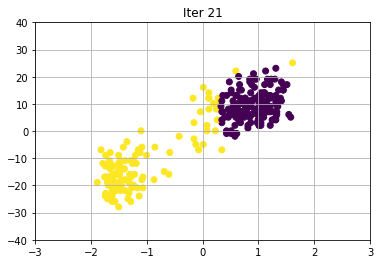

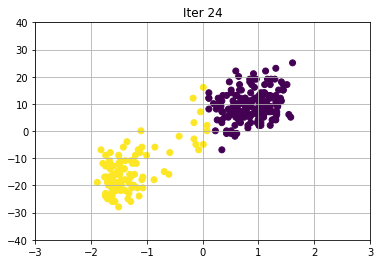

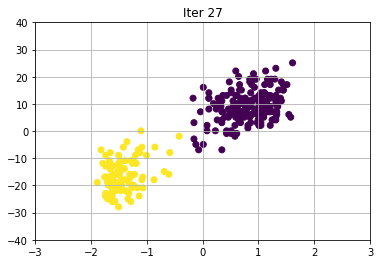

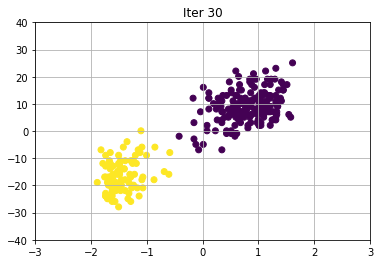

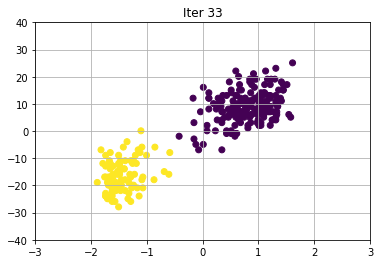

In [9]:
runfor = 33
interval = int(runfor / 9)
for epoch in range(runfor):
#     print epoch
    weights = update_weights(mus, covs, mws)
#     print np.sum(weights, axis=1)
    mws = update_mws(mws, weights)
#     print mws
    covs = update_covs(covs, mus, weights)
#     print covs
    mus = update_mus(mus, weights)
#     print mus
#     plt.plot(cov_to_pts( data.T ))
#     plt.plot(cov_to_pts( covs[1] ))
    if epoch % interval == 0:
        plt.scatter(data.T[0], data.T[1], c=np.argmax(weights, axis=0))
#         line = plt.plot(cov_to_pts( covs[0] ))
#         line[0].set_label('Class 1')
#         line = plt.plot(cov_to_pts( covs[1] ))
#         line[0].set_label('Class 2')
        plt.xlim(xmin=-3.0,xmax=3.0)
        plt.ylim(ymin=-40,ymax=40)
        plt.title('Iter ' + str(epoch))
        plt.grid(True)
        plt.legend()
        plt.show()
        
plt.scatter(data.T[0], data.T[1], c=np.argmax(weights, axis=0))
#         line = plt.plot(cov_to_pts( covs[0] ))
#         line[0].set_label('Class 1')
#         line = plt.plot(cov_to_pts( covs[1] ))
#         line[0].set_label('Class 2')
plt.xlim(xmin=-3.0,xmax=3.0)
plt.ylim(ymin=-40,ymax=40)
plt.title('Iter ' + str(runfor))
plt.grid(True)
plt.legend()
plt.show()

In [10]:
print "the purple dots represent the points that are predicted to be part of class 2, while the yellow dots are predicted to be part of class 1"

the purple dots represent the points that are predicted to be part of class 2, while the yellow dots are predicted to be part of class 1
